In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression

In [3]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
list(data.columns)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

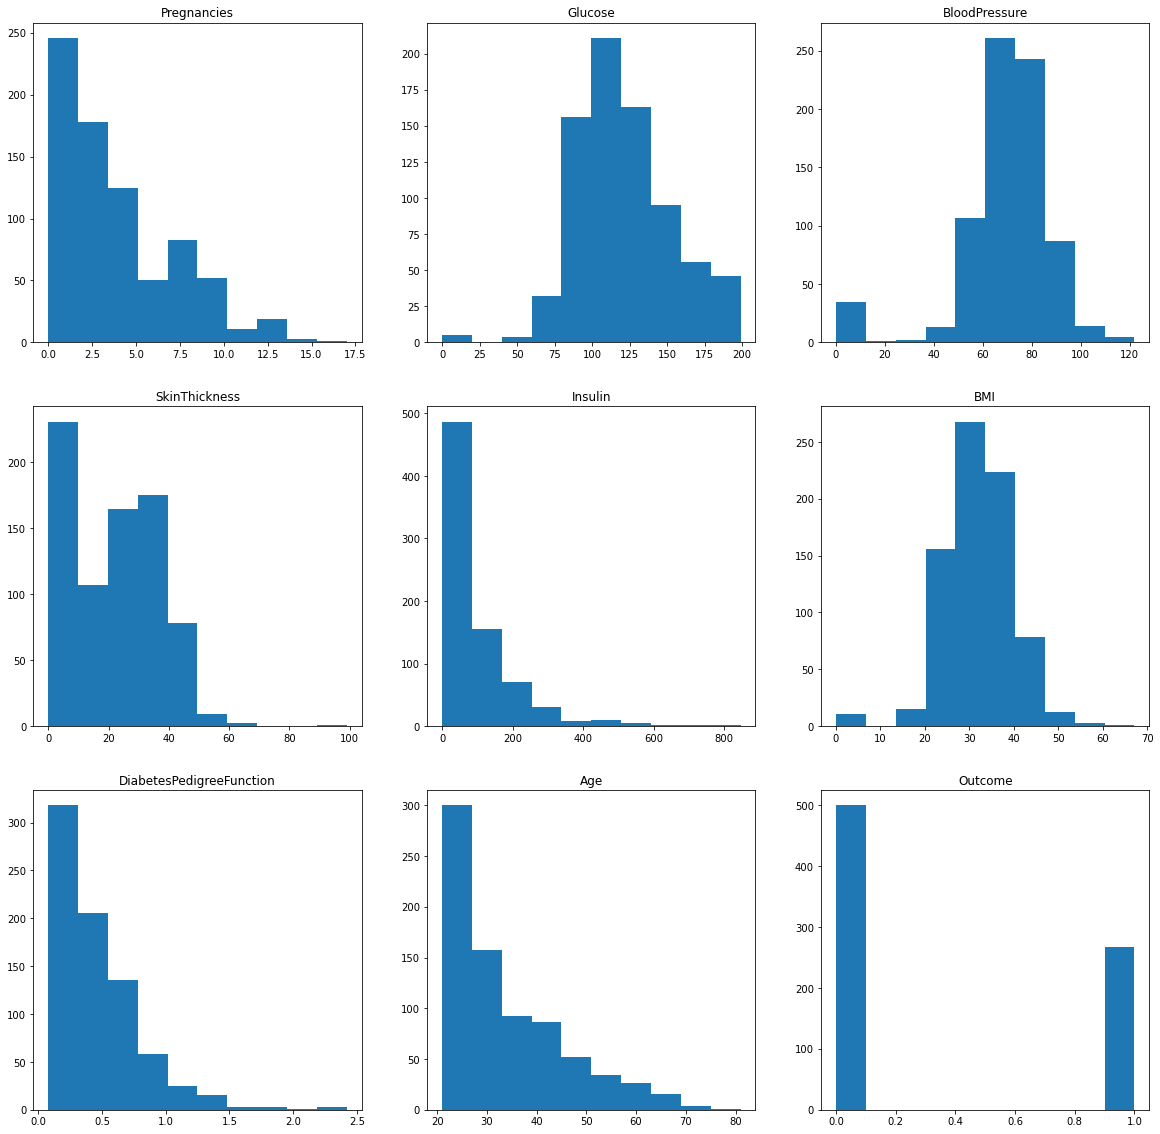

In [8]:
cols = list(data.columns)
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
for i, col in enumerate (cols):
    plt.subplot(3, 3, i+1)
    plt.hist(data[col])
    plt.title(col)

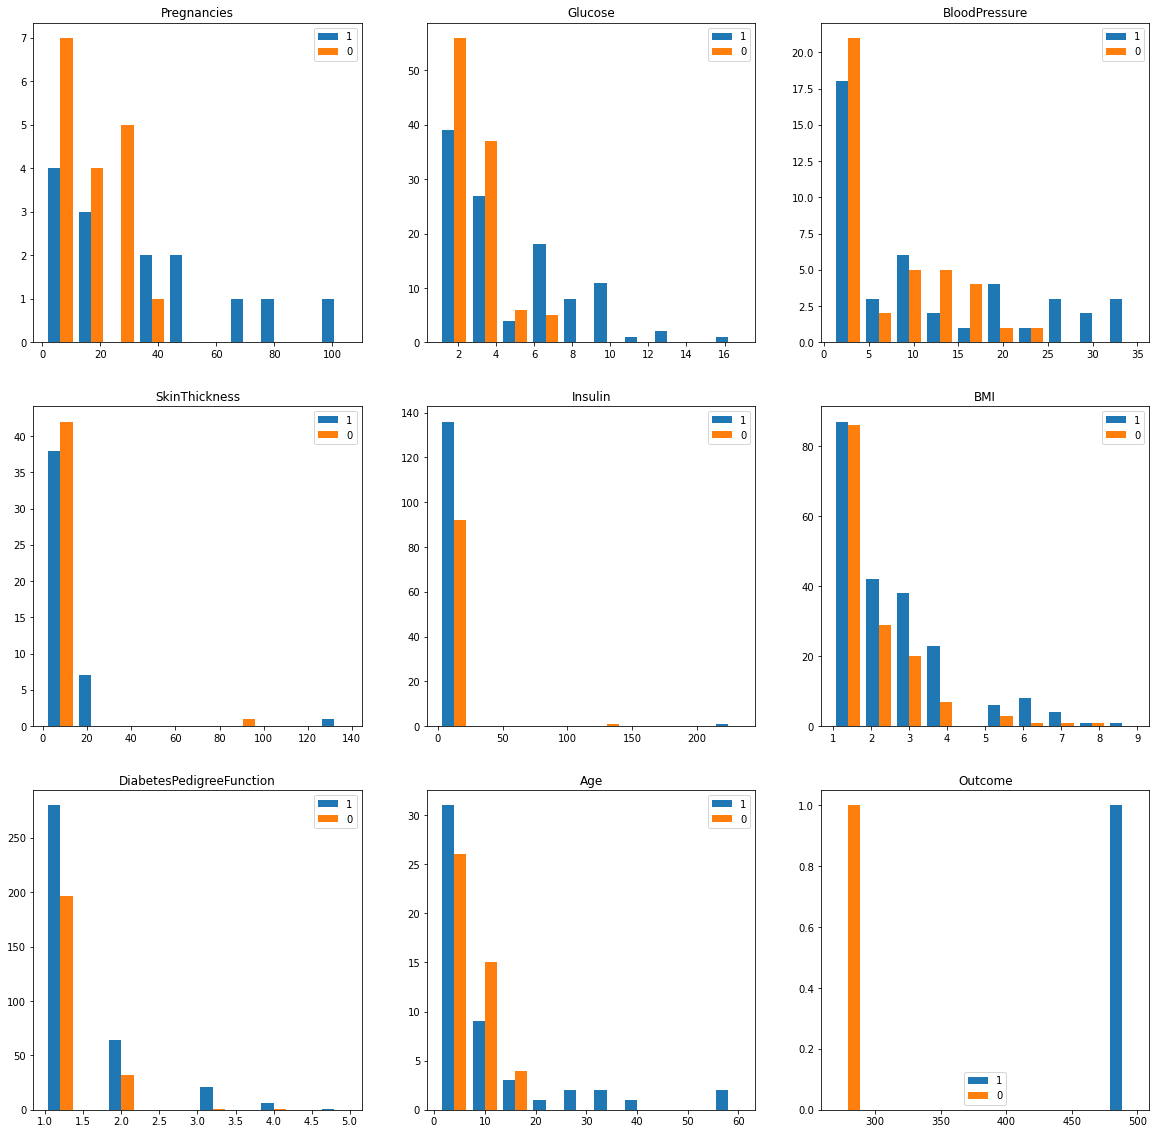

In [9]:
cols = list(data.columns)

fig, ax = plt.subplots(3, 3, figsize=(20, 20))
for i, col in enumerate(cols):
    plt.subplot(3, 3, i+1)
    plt.hist(data.groupby([col, 'Outcome']).size().unstack(), label=data['Outcome'])
    plt.title(col)
    plt.legend()

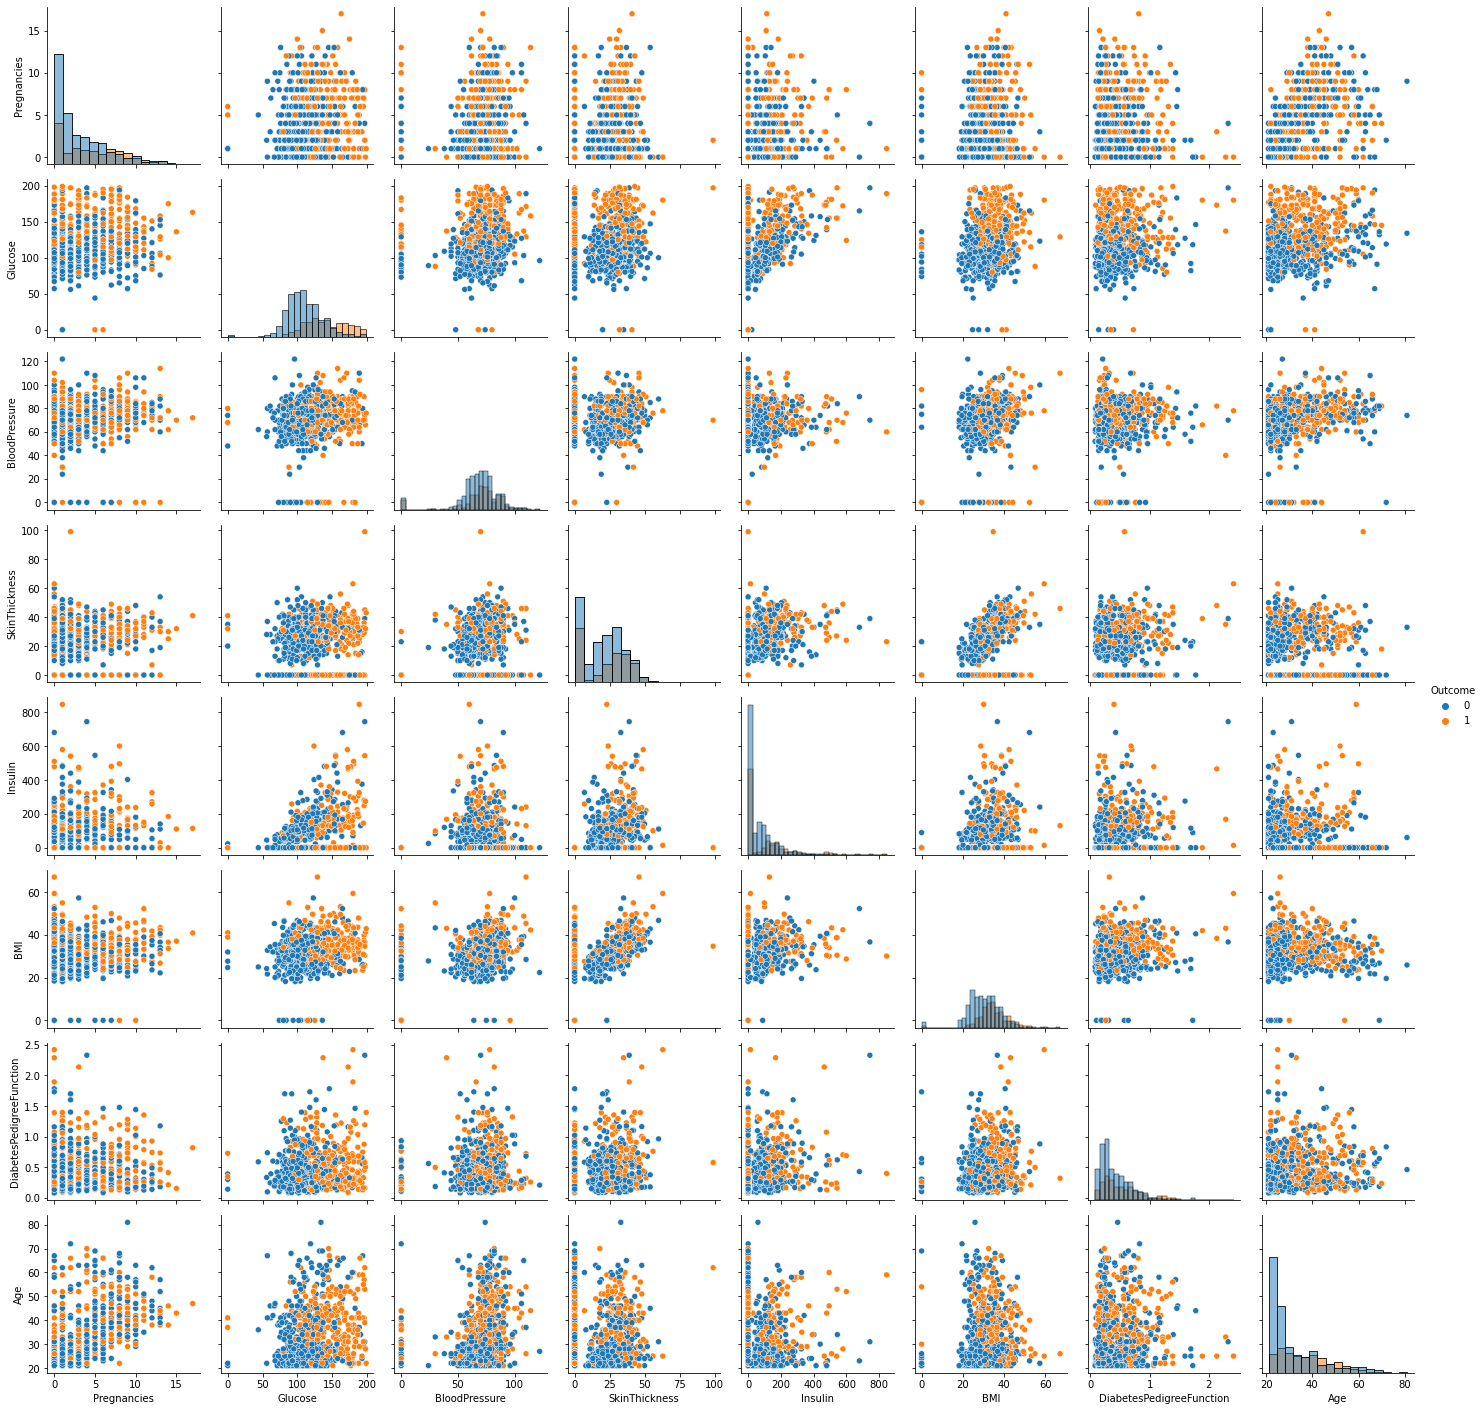

In [10]:
g = sns.PairGrid(data, hue='Outcome')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

<AxesSubplot:>

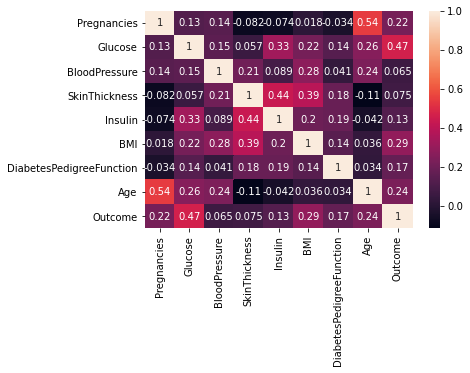

In [11]:
sns.heatmap(data.corr(), annot=True)

In [22]:
X = data.drop('Outcome', axis=1)
y=data['Outcome']
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)
print(X_train.shape, y_test.shape)

(576, 8) (192,)


In [27]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

In [45]:
clf = LogisticRegression(max_iter=1000)
clf.fit(train_scaled, y_train)
clf.score(train_scaled, y_train), clf.score(test_scaled, y_test)

(0.7795138888888888, 0.7291666666666666)

In [47]:
X_pred = clf.predict(test_scaled)
confusion_matrix(y_test, X_pred)

array([[95, 28],
       [24, 45]], dtype=int64)

<AxesSubplot:>

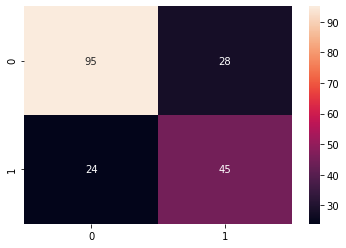

In [48]:
sns.heatmap(confusion_matrix(y_test, X_pred), annot=True)

In [50]:
cross_val_score(clf, train_scaled, y_train, cv=5)

array([0.81034483, 0.76521739, 0.8       , 0.73043478, 0.77391304])

In [52]:
print(classification_report(y_test, X_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       123
           1       0.62      0.65      0.63        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192



In [56]:
distributions = dict(C=np.linspace(2, 1000, 100), penalty=['l2', 'l1'])

clf = RandomizedSearchCV(LogisticRegression(solver='saga',random_state=42), 
                         distributions, scoring='recall', n_iter=100, 
                         n_jobs=-1, )
clf_logistic = clf.fit(train_scaled, y_train)
clf_logistic.best_params_

{'penalty': 'l2', 'C': 213.69696969696972}

In [58]:
logreg = LogisticRegression(penalty='l2', C=213.69696969696972)
logreg.fit(train_scaled, y_train)
logreg.score(train_scaled, y_train), logreg.score(test_scaled, y_test)

(0.78125, 0.7291666666666666)